# Import packages

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
# silence NumbaPerformanceWarning
import warnings
from numba.errors import NumbaPerformanceWarning
warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.23.0 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Import the FBM HSC, MEMP, MK

In [3]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20201007.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 103228 × 33712 
    obs: 'cell.labels', 'doublets', 'fetal.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'processing.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sort.ids', 'april_cell.labels', 'cell.labels_20200708', 'cell.labels_20200713', 'cell.labels_20200718', 'nk_meta', 'mito.threshold'
    var: 'gene_ids-1', 'feature_types-1'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [5]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell                   327
CD8 T cell                   171
CD14 monocyte               8763
CD56 bright NK               449
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
ELP                         1357
GMP                         1281
HSC                           92
ILC precursor                 67
LMPP                          34
MEMP                          16
MEP                          269
MK                          1000
MOP                         3838
MPP myeloid                   92
NK T cell                    111
NK progenitor                 26
Treg                          62
adipo-CAR                    353
arteriolar fibroblast         83
basophil                     139
chondrocyte                   80
early MK                    1624
early erythroid             7474
early osteoblast             280
endosteal fibroblast          5

In [6]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [7]:
adata = adata[adata.obs['cell.labels'].isin(['HSC', 'MEP', 'MEMP', 'early MK', 'MK'])].copy()

In [8]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC           92
MEMP          16
MEP          269
MK          1000
early MK    1624
dtype: int64

In [9]:
adata.obs['cell.labels'] = adata.obs['cell.labels'].replace(["early MK", "MK"], ["MK", "MK"])

In [10]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC       92
MEMP      16
MEP      269
MK      2624
dtype: int64

In [11]:
adata.obs["cell.labels"] = adata.obs["cell.labels"].replace(["MEP", "MEMP"], ["MEP_MEMP", "MEP_MEMP"])

In [12]:
adata.obs["dataset"] = "FBM"

In [13]:
fbm = adata

# Import the FBM DS HSC, MEMP, MK

In [14]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/fbm_ds_cite_seq/data/fbm_ds_citeseq_plus_scrna_forMS_20210119.h5ad')

In [15]:
adata

AnnData object with n_obs × n_vars = 16743 × 33694 
    obs: '__is_in_cluster__', 'age', 'auto_prd', 'batch', 'cell.labels', 'cell.labels_20200713', 'is_doublet', 'lanes', 'leiden', 'lr_pred', 'mad_prd', 'nGene', 'nUMI', 'n_genes', 'orig.ident', 'percent.mito', 'sequencing.type', 'sex', 'souporcell_assignment', 'souporcell_doublet'
    var: 'gene_ids-0', 'gene_ids-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [16]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CAR                          4
CD8 T cell                 181
CD14 monocyte              320
CD56 bright NK              79
CMP                         50
DC1                         45
DC2                        228
DC3                        108
HSC                        105
ILC precursor               13
MEMP                       130
MK                          83
MOP                        422
MSC                         53
Treg                         8
chondrocyte                  4
early B cell                42
early MK                    34
early erythroid           1348
endothelium                111
eo/baso/mast precursor      53
eosinophil                  63
late erythroid            6336
macrophage                 113
mast cell                   39
mast cell                   27
mature B cell               31
mature NK                  147
mid erythroid             5230
myelocyte                  243
neutrophil                 273
osteoblast                 

In [17]:
adata = adata[adata.obs['cell.labels'].isin(['HSC', 'MEMP', 'early MK', 'MK'])].copy()

In [18]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC         105
MEMP        130
MK           83
early MK     34
dtype: int64

In [19]:
adata.obs['cell.labels'] = adata.obs['cell.labels'].replace(["early MK", "MK"], ["MK", "MK"])

In [20]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC     105
MEMP    130
MK      117
dtype: int64

In [21]:
adata.obs["dataset"] = "ds_fbm"
ds_fbm = adata

# Combine the datasets

In [22]:
merged = fbm.concatenate(ds_fbm, index_unique=None, join='inner')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:1880: UserWarning: Only some adata objects have `.raw` attribute, not concatenating `.raw` attributes.
  UserWarning,


In [23]:
merged.shape

(3353, 33694)

In [24]:
cell_numbers = merged.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC          197
MEMP         130
MEP_MEMP     285
MK          2741
dtype: int64

In [25]:
merged.obs["dataset_cell.labels"] = merged.obs["dataset"].astype(str) + '_' + merged.obs["cell.labels"].astype(str)

In [26]:
cell_numbers = merged.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
FBM_HSC           92
FBM_MEP_MEMP     285
FBM_MK          2624
ds_fbm_HSC       105
ds_fbm_MEMP      130
ds_fbm_MK        117
dtype: int64

# Pre-process the data

In [27]:
adata=merged

In [28]:
# normalise count data 
sc.pp.normalize_total(adata)

In [29]:
# log the count data 
sc.pp.log1p(adata)

In [30]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [31]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Run the dotplot

In [32]:
genes=['SPI1', 'FLI1', 'GABPA']

... storing '__is_in_cluster__' as categorical
... storing 'age' as categorical
... storing 'april_cell.labels' as categorical
... storing 'auto_prd' as categorical
... storing 'cell.labels' as categorical
... storing 'cell.labels_20200708' as categorical
... storing 'cell.labels_20200713' as categorical
... storing 'cell.labels_20200718' as categorical
... storing 'dataset' as categorical
... storing 'doublets' as categorical
... storing 'fetal.ids' as categorical
... storing 'gender' as categorical
... storing 'is_doublet' as categorical
... storing 'is_doublet_poptrim' as categorical
... storing 'is_doublet_wolock' as categorical
... storing 'lanes' as categorical
... storing 'leiden' as categorical
... storing 'lr_pred' as categorical
... storing 'mad_prd' as categorical
... storing 'mito.threshold' as categorical
... storing 'nk_meta' as categorical
... storing 'orig.ident' as categorical
... storing 'processing.type' as categorical
... storing 'sequencing.type' as categorical
...

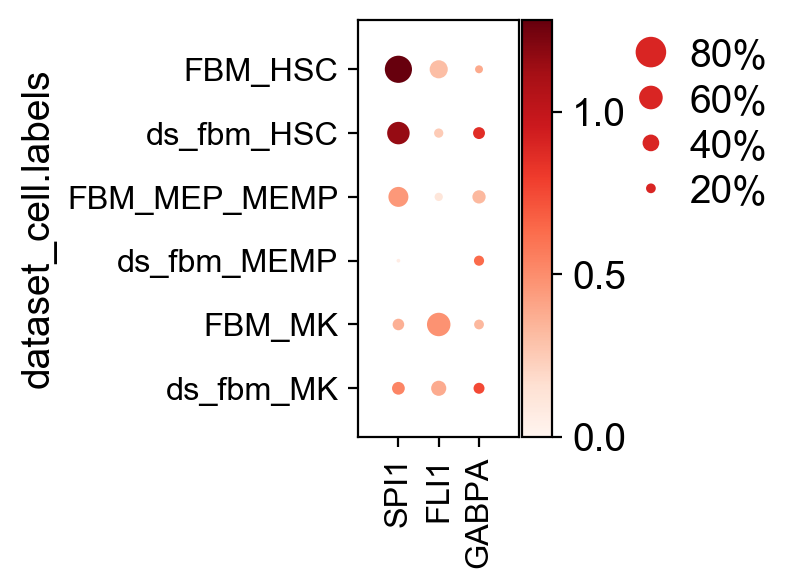

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[1.0499999999999998, 0, 0.2, 0.5, 0.25])

In [33]:
sc.settings.set_figure_params(dpi=100, dpi_save=1000)

adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].astype('category')

adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].cat.reorder_categories(
    ['FBM_HSC', "ds_fbm_HSC", "FBM_MEP_MEMP", "ds_fbm_MEMP", "FBM_MK", "ds_fbm_MK"])

sc.pl.dotplot(adata, var_names=genes, groupby="dataset_cell.labels", use_raw=False, 
              save="figs8h_hsc_memp_mk_dotplot_20210430.pdf")

# Save data

In [34]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [35]:
adata.X

<3353x33694 sparse matrix of type '<class 'numpy.float32'>'
	with 11878714 stored elements in Compressed Sparse Row format>

In [36]:
adata.raw.X

AttributeError: 'NoneType' object has no attribute 'X'

In [37]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk3/data/figs8h_ds_non-ds_hsc_memp_mk_dotplot_20210430.h5ad")